# 🔢 **MNIST Digit Classification | TF CNN - ACC 0.99**
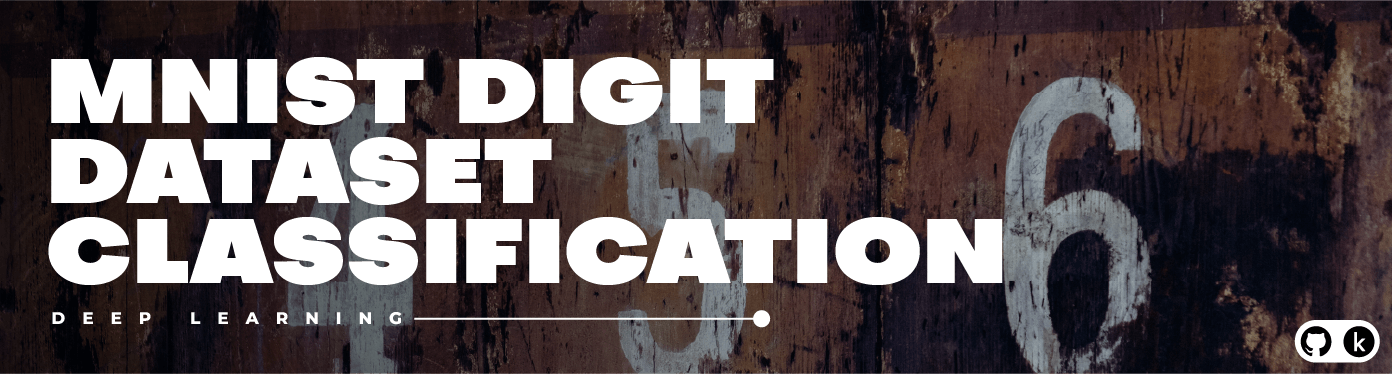
The provided notebook focuses on `MNIST Digit Classification` using a `TensorFlow Convolutional Neural Network (CNN)` to achieve an impressive accuracy of `99%`. The content includes importing and preprocessing the data, reshaping and normalizing image dimensions, visualizing random samples of the MNIST dataset, and splitting the dataset into training and testing sets. The code is beginner-friendly, offering step-by-step guidance through essential deep learning concepts. By working on this project, users gain a strong understanding of CNNs, which are pivotal in many real-life applications, including image recognition and object detection. This foundational knowledge will be highly beneficial for transitioning to more advanced deep learning tasks.

# **Importing Data**

In [3]:
# getting file directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        src = os.path.join(dirname, filename)

In [4]:
# loading data
from scipy.io import loadmat

mnist = loadmat(src)
X = mnist["data"].T
y = mnist["label"][0]

In [5]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
y

array([0., 0., 0., ..., 9., 9., 9.])

# **Data Preprocessing**

## **Reshaping Image Dimensions**

In [7]:
# getting image dimensions
X.shape

(70000, 784)

In [8]:
# reshaping the data to (number of samples, 28, 28, 1)
X = X.reshape(-1, 28, 28, 1)

## **Normalizing Image Pixel Values**

In [9]:
# normalizing the pixel values to range [0, 1]
X = X / 255.0

## **Looking at images**

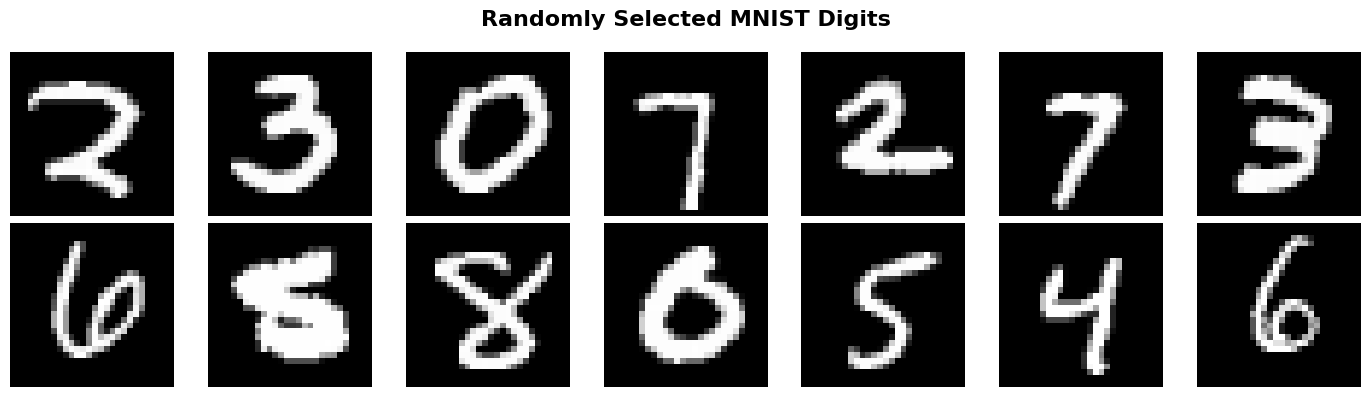

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# generating 10 random indices
random_indices = np.random.choice(X.shape[0], 14, replace=False)

# creating a 2x5 subplot
fig, axes = plt.subplots(2, 7, figsize=(14, 4))

for i, ax in enumerate(axes.flat):
    
    # plotting each digit
    ax.imshow(X[random_indices[i]].reshape(28, 28), cmap='gray')
    ax.axis('off')

# adding a title over the entire plot
fig.suptitle('Randomly Selected MNIST Digits', fontsize=16, fontweight = 'bold')

plt.tight_layout()
plt.show()

## **Splitting Test and Train**

In [35]:
from sklearn.model_selection import train_test_split

# Assume X and y are your original dataset arrays
num_samples_to_remove = 14

# Get the total number of samples in the dataset
total_samples = len(X)

# Randomly choose 14 indices from the dataset
random_indices = np.random.choice(total_samples, num_samples_to_remove, replace=False)

# Extract the selected images and labels for final testing of the model
X_final = X[random_indices]
y_final = y[random_indices]

# Remove the selected images and labels from the original dataset
X_remaining = np.delete(X, random_indices, axis=0)
y_remaining = np.delete(y, random_indices, axis=0)

# Split the remaining dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_remaining, y_remaining, test_size=0.2, random_state=42)

# **Model Training**

## **Setting GPU as Default**

In [12]:
import tensorflow as tf

# Set device placement logging
tf.debugging.set_log_device_placement(True)

# Check available devices
print("Available devices:")
for device in tf.config.list_physical_devices():
    print(device)

# Ensure GPU is available
if not tf.config.list_physical_devices('GPU'):
    raise RuntimeError('No GPU device found.')

Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## **Training Model**

Epoch 1/50


I0000 00:00:1725163599.315299     175 service.cc:145] XLA service 0x7ebd4800c640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725163599.315350     175 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 37/438 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3889 - loss: 1.8048

I0000 00:00:1725163601.292752     175 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8271 - loss: 0.5285 - val_accuracy: 0.9759 - val_loss: 0.0778
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 0.0519 - val_accuracy: 0.9840 - val_loss: 0.0520
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0344 - val_accuracy: 0.9875 - val_loss: 0.0391
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9909 - loss: 0.0274 - val_accuracy: 0.9896 - val_loss: 0.0343
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9949 - loss: 0.0166 - val_accuracy: 0.9889 - val_loss: 0.0376
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9958 - loss: 0.0132 - val_accuracy: 0.9889 - val_loss: 0.0413
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9959 - loss: 0.0125 - val_accuracy: 0.9900 - val_loss: 0.0376
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9957 - loss: 0.0121 - val_accuracy: 0.9886 - val

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,368,608 (5.22 MB)

 Trainable params: 456,202 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 912,406 (3.48 MB)

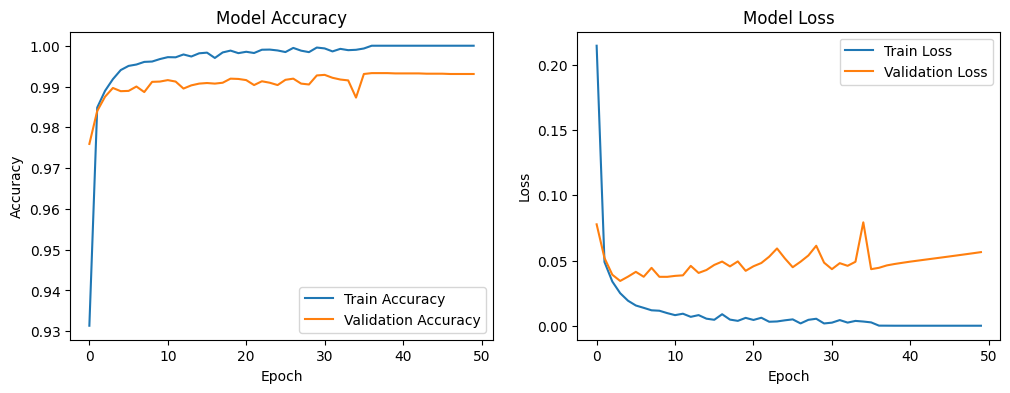

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1370
           1       0.99      1.00      1.00      1558
           2       0.99      0.99      0.99      1398
           3       1.00      0.99      0.99      1406
           4       1.00      0.99      0.99      1410
           5       0.99      0.99      0.99      1294
           6       1.00      0.99      0.99      1383
           7       0.99      0.99      0.99      1449
           8       0.99      0.99      0.99      1387
           9       0.99      0.99      0.99      1343

    accuracy                           0.99     13998
   macro avg       0.99      0.99      0.99     13998
weighted avg       0.99      0.99      0.99     13998



In [13]:
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import classification_report

tf.debugging.set_log_device_placement(False)

# converting data to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Define your model here
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),                                # Input layer with 28x28x1 dimensions (grayscale)
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),   # First convolutional layer with 32 filters
    layers.MaxPooling2D((2, 2)),                                    # First max-pooling layer
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),   # Second convolutional layer with 64 filters
    layers.MaxPooling2D((2, 2)),                                    # Second max-pooling layer
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # Third convolutional layer with 128 filters
    layers.MaxPooling2D((2, 2)),                                    # Third max-pooling layer
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  # Fourth convolutional layer with 256 filters
    layers.MaxPooling2D((2, 2)),                                    # Fourth max-pooling layer
    layers.Flatten(),                                               # Flatten the 2D feature maps to a 1D vector
    layers.Dense(256, activation='relu'),                           # Fully connected layer with 256 units
    layers.Dense(10, activation='softmax')                          # Output layer with 10 units (one for each digit)
])


# Configure GPU usage
with tf.device('/device:GPU:0'):
    # Compile the model
    opt = optimizers.Adam()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Print a summary of the model
print('\n')
model.summary()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# **Model Testing**

## **Designing the Pipeline**

In [55]:
def predict_image(X_final, y_final):
    
    # converting arrays to tensors
    X_final = tf.convert_to_tensor(X_final, dtype=tf.float32)
    y_final = tf.convert_to_tensor(y_final, dtype=tf.int32)
    
    # make predictions
    y_pred_final = model.predict(X_final)
    
    # choosing the most resembling class
    y_pred_classes = np.argmax(y_pred_final, axis=1)
    
    return y_final, y_pred_classes

## **Making Predictions**

In [56]:
# predict the images
y_final, y_pred_classes = predict_image(X_final, y_final)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


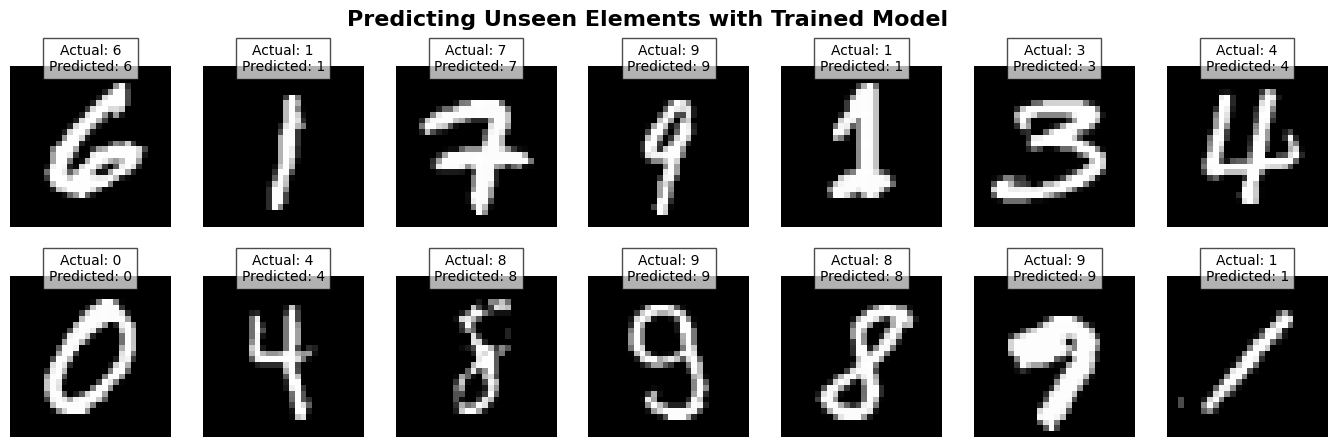

In [68]:
# enabling numpy behavior in TensorFlow
tf.experimental.numpy.experimental_enable_numpy_behavior()

# creating a 2x7 subplot
fig, axes = plt.subplots(2, 7, figsize=(17, 5))

for i, ax in enumerate(axes.flat):
    
    # plotting each digit
    ax.imshow(X_final[i].reshape(28, 28), cmap='gray')
    
    # adding actual and predicted class labels
    actual_class = y_final[i]
    predicted_class = y_pred_classes[i]
    ax.text(0.5, 1.05, f'Actual: {actual_class}\nPredicted: {predicted_class}',
            transform=ax.transAxes, ha='center', va='center', fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7))
    
    ax.axis('off')

# adding a title over the entire plot
fig.suptitle('Predicting Unseen Elements with Trained Model', fontsize=16, fontweight='bold')
plt.show()

> **`NOTE:`** The images presented above were extrated from the original dataset but were not present in either testing or training datasets. 

**Hence, we can see that we have successfully made accurate predictions!**

# **THANK YOU**
---